In [1]:
from matplotlib import pyplot as plt
import numpy as np

from scipy.io import wavfile 
import scipy as sp
from scipy import fftpack

import IPython
import cmath

/Users/matheson/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
#sample -> amplitude at specific time
#sample rate -> frequency

#Hertz, Hz is samples taken per second

#Problem 1
class Signal(object):
    '''A Signal object stored as a sample rate and an array of samples 
    Attributes:
        sample_rate: rate of the sample (integer)
        samples: an array of samples'''
    def __init__(self, sample_rate, samples):
        '''store rate and array as attributes'''
        self.rate = sample_rate
        self.samples = samples
        
        
    def __add__(self, other):
        if self.rate != other.rate:
            raise ValueError("The sample rates have to be the same!")
        new_sample = self.samples + other.samples
        #new_sample *= 1./2
        return Signal(self.rate, new_sample)
        
             
#Problem 5
    def plot(self):
        x = np.linspace(0, len(self.samples)/self.rate, len(self.samples)) #Want x axis in seconds
        y = self.samples
        
        plt.subplot(121)
        plt.plot(x,y)
        plt.xlabel("Seconds")
        
        
            #fftpack.fft
        dft = fftpack.fft(self.samples)
        x_vals = sp.arange(1, len(dft)+1, 1)*1.
        x_vals = x_vals/len(self.samples) * self.rate
        plt.subplot(122)
        plt.plot(x_vals, self.samples)
        
        #plt.plot(x_vals, abs(dft))
    
        #plt.tight_layout()
        plt.show()
            
        
#Problem 2
    def export(self, filename):
        '''Accepts a file name and generates a .wav file from the sample rate and the array of samples'''
            #need to scale if it is out of bounds -32767 and 32767
            
            # 32767 / max      then times this by everything in the list
        
        scale = np.max(np.abs(self.samples))
        sample = (32767 / scale) * self.samples
        samples = sp.int16(sample)
         #function expects an array of 16 bit integers
        wavfile.write(filename, self.rate, samples)

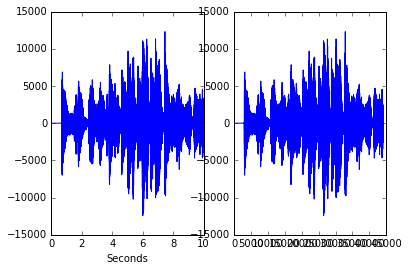

In [4]:
rate, wave = wavfile.read("chopin.wav")
s = Signal(rate, wave)
s.plot()

In [5]:
#Problem 3
#A note played for 5 seconds
def note_generator(frequency=440, duration=5):
    samplerate =  44100
                #typical number of samples per second
    wave_function = lambda x: np.sin(2*np.pi*x*frequency)
    
    stepsize = 1./samplerate
    sample_points = np.arange(0, duration, stepsize)
    samples = wave_function(sample_points)
    
    #scaled_samples = np.int16(samples*32767) 
    #scale things?
    return Signal(samplerate, samples)

#x = note_generator()
#x.plot()

In [6]:
#Problem 4

def DFT(array):
    
    coeff = np.array([])
    n = len(array)
    #length of samples?
    #k=1
    for x in xrange(0, n): #goes to n-1
        for y in xrange(n):
            c[x] = array[y]*cmath.exp((2*np.pi*1j*x*y)/n)   #k ?
            #maybe Just the e part?
            # return matrix??
            # c = 
            #coeff.append(c)
            #k += 1
    return coeff
    #use 9.1 and return array of coeff

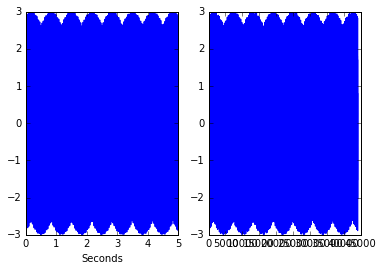

In [8]:
#Problem 6
#A, C, E

A = note_generator(440)
C = note_generator(523.23)
E = note_generator(659.25)

G = note_generator(783.99)
B = note_generator(493.88)
D = note_generator(587.33)

#create several chords and observe DFT plot

#play with duration

a_minor = A+C+E
g_minor = G+B+D

a_minor.plot()

a_minor.export("Aminor.wav")

#create a sound that changes over time
song = Signal(A.rate, np.hstack((C.samples,G.samples,A.samples)))
song.export("mysong.wav")
IPython.display.Audio("mysong.wav")

In [18]:
IPython.display.Audio("Aminor.wav")